In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import dlsfunctions as dls

In [ ]:
%%latex
Goal: test to see if the numericalderiv function is the culprit due to lack of initialization

In [2]:
r = 2.24e-09
diameter = r * 2 + 3e-9
sigma = 2e-10

m = 20
c = 1
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)

In [3]:
theta_in = np.append(f_1, beta)
sim_data = dls.g2(theta_in, d, m, gamma, time_in)

In [6]:
ndim = 21
nwalkers = 100
nsteps = 2500

start_pos = [theta_in + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, sim_data, m, gamma, time_in))

In [7]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

array([0.3232, 0.3472, 0.338 , 0.3572, 0.344 , 0.3392, 0.3372, 0.3536,
       0.3244, 0.3304, 0.3424, 0.3348, 0.3308, 0.3132, 0.3496, 0.3304,
       0.3384, 0.3476, 0.3476, 0.316 , 0.312 , 0.3444, 0.3276, 0.316 ,
       0.3416, 0.3364, 0.328 , 0.328 , 0.3336, 0.336 , 0.3304, 0.3192,
       0.3376, 0.3228, 0.3292, 0.3272, 0.36  , 0.306 , 0.324 , 0.3208,
       0.3488, 0.3412, 0.3416, 0.3216, 0.3324, 0.3424, 0.3364, 0.3368,
       0.34  , 0.3256, 0.3348, 0.3132, 0.3476, 0.3176, 0.3248, 0.348 ,
       0.3304, 0.3448, 0.3084, 0.3416, 0.3092, 0.3256, 0.3252, 0.344 ,
       0.3732, 0.3216, 0.3416, 0.3208, 0.3396, 0.3368, 0.3188, 0.332 ,
       0.3412, 0.3228, 0.3452, 0.332 , 0.3452, 0.316 , 0.3588, 0.3356,
       0.3492, 0.33  , 0.3584, 0.3252, 0.3408, 0.3372, 0.3364, 0.344 ,
       0.3376, 0.3216, 0.3204, 0.3304, 0.3376, 0.3412, 0.3348, 0.3444,
       0.3324, 0.316 , 0.31  , 0.3624])

In [9]:
import seaborn as sns
import pandas as pd

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

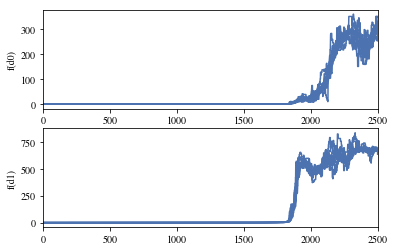

In [10]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

In [12]:
samples = sampler.chain[:,2300:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta': traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [13]:
q

,f(d0),f(d1),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9),...,f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),f(d17),f(d18),f(d19),beta
0.16,219.588241,645.157026,20.075301,19.966817,24.213410,3038.558413,252.922682,139.146105,2702.859049,124.964226,...,99.256242,192.122690,793.931256,3.340933e+06,8.304854e+08,1.385934e+09,1.552960e+07,127.925563,5.760562,0.549769
0.50,271.852942,675.052128,37.275498,28.450174,41.109501,3146.778869,287.978622,212.784395,2777.908096,171.783386,...,146.189104,383.103542,836.537262,3.341091e+06,8.304855e+08,1.385934e+09,1.552985e+07,203.047625,13.330513,0.923271
0.84,305.430620,700.788723,62.638278,37.661560,58.527178,3259.654094,341.175797,285.754197,2947.815452,218.835284,...,206.738580,567.657662,902.198797,3.341286e+06,8.304855e+08,1.385934e+09,1.553007e+07,256.710829,30.210731,1.321700


In [15]:
infer_f = q.quantile([0.5], axis=0)
infer_f = infer_f.values
infer_f = infer_f.flatten()

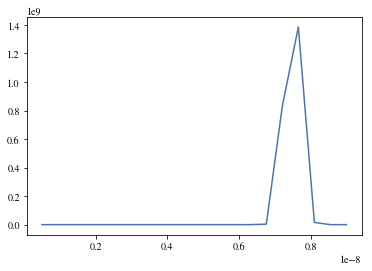

In [17]:
plt.plot(d, infer_f[0:m])

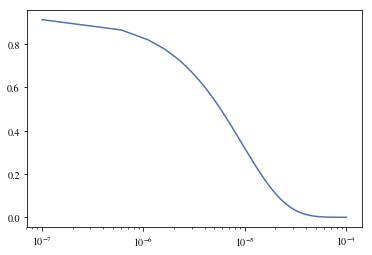

In [18]:
infer_g2 = dls.g2(infer_f, d, m, gamma, time_in)
plt.semilogx(time_in, infer_g2)

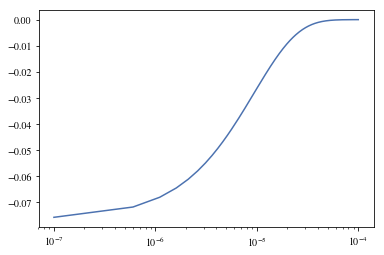

In [19]:
plt.semilogx(time_in, infer_g2 - sim_data)